In [2]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'font.size': 20})

In [2]:
# Given the 15min interval measurement of the weather data
# predict the 15min interval power generation

In [3]:
# Weather data is collected at the plant level.
df_x = pd.read_csv('Data/FES/Raw/Plant_2_Weather_Sensor_Data.csv')

# Generation data is collected at the inverter level.
df_y = pd.read_csv('Data/FES/Raw/Plant_2_Generation_Data.csv')

In [4]:
# The weather sensor data should be the input data
df_x

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [5]:
# Not all inventer are working at all times
df_y

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [4]:
# Group the data by date and sum the daily yield
df_grouped = df_y.groupby(pd.to_datetime(df_y['DATE_TIME']))['DAILY_YIELD'].sum()

# Compute the difference of the daily yield between intervals
df_grouped_diff = df_grouped.diff()
df_grouped = pd.concat([df_grouped, df_grouped_diff], axis=1)
df_grouped.columns = ['DAILY_YIELD', 'DAILY_YIELD_DIFF']
df_grouped.reset_index(inplace=True)

print(df_grouped.isnull().sum())
# Print the grouped data and the difference
print(df_grouped)

df_grouped.fillna(0, inplace=True)

DATE_TIME           0
DAILY_YIELD         0
DAILY_YIELD_DIFF    1
dtype: int64
               DATE_TIME   DAILY_YIELD  DAILY_YIELD_DIFF
0    2020-05-15 00:00:00  48899.938095               NaN
1    2020-05-15 00:15:00  28401.000000     -20498.938095
2    2020-05-15 00:30:00  28401.000000          0.000000
3    2020-05-15 00:45:00  28401.000000          0.000000
4    2020-05-15 01:00:00  26516.000000      -1885.000000
...                  ...           ...               ...
3254 2020-06-17 22:45:00  93040.000000          0.000000
3255 2020-06-17 23:00:00  93040.000000          0.000000
3256 2020-06-17 23:15:00  93040.000000          0.000000
3257 2020-06-17 23:30:00  93040.000000          0.000000
3258 2020-06-17 23:45:00  93040.000000          0.000000

[3259 rows x 3 columns]


In [5]:
df_grouped

,DATE_TIME,DAILY_YIELD,DAILY_YIELD_DIFF
0,2020-05-15 00:00:00,48899.938095,0.000000
1,2020-05-15 00:15:00,28401.000000,-20498.938095
2,2020-05-15 00:30:00,28401.000000,0.000000
3,2020-05-15 00:45:00,28401.000000,0.000000
4,2020-05-15 01:00:00,26516.000000,-1885.000000
...,...,...,...
3254,2020-06-17 22:45:00,93040.000000,0.000000
3255,2020-06-17 23:00:00,93040.000000,0.000000
3256,2020-06-17 23:15:00,93040.000000,0.000000
3257,2020-06-17 23:30:00,93040.000000,0.000000


In [6]:
# Daily yield difference can not be negative
df_negative = df_grouped.loc[(df_grouped['DAILY_YIELD_DIFF'] < 0)]

df_grouped.loc[df_grouped['DAILY_YIELD_DIFF'] < 0, 'DAILY_YIELD_DIFF'] = 0

In [7]:
# There are some intervals that are not in the generation data, filter out those dates
# do it twice to make sure the data is clean
x_dates_in_grouped = df_x[pd.to_datetime(df_x['DATE_TIME']).isin(pd.to_datetime(df_grouped['DATE_TIME']))]
df_grouped = df_grouped[pd.to_datetime(df_grouped['DATE_TIME']).isin(pd.to_datetime(x_dates_in_grouped['DATE_TIME']))]

In [8]:
x_dates_in_grouped['DATE_TIME'] = pd.to_datetime(x_dates_in_grouped['DATE_TIME'])

In [9]:
new_df = pd.merge(x_dates_in_grouped, df_grouped, on='DATE_TIME')

In [10]:
new_df = new_df.drop(columns=['PLANT_ID', 'SOURCE_KEY', 'DAILY_YIELD'])

In [11]:
new_df['HOUR'] = new_df['DATE_TIME'].dt.hour
new_df['MINUTE'] = new_df['DATE_TIME'].dt.minute

In [12]:
new_df = new_df.drop(columns=['DATE_TIME'])

In [13]:
# Filter all spikes in the data
new_df = new_df.loc[new_df['DAILY_YIELD_DIFF']<=10000]

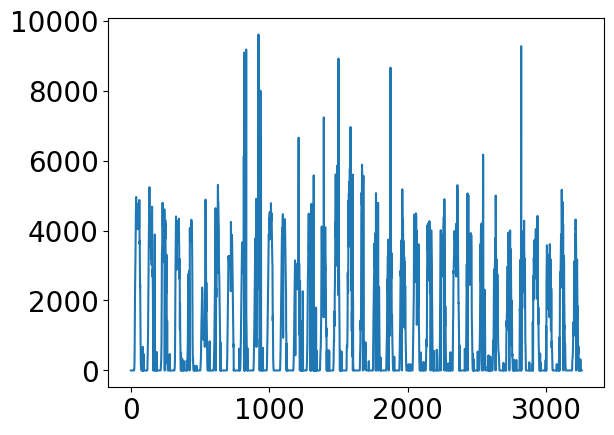

In [14]:
plt.plot(new_df['DAILY_YIELD_DIFF'])

In [24]:
new_df.to_csv('Data\FES\processed_solar2_filtered.csv', sep = ',', index = False)

In [25]:
# Read the processeed data
data = pd.read_csv('Data/FES/processed_solar2_filtered.csv')

x = data.drop(columns=['DAILY_YIELD_DIFF'])
y = data['DAILY_YIELD_DIFF']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [27]:
x_train.to_csv('Data/FES/solar2_x_train_filtered.csv', sep = ',', index = False)
x_test.to_csv('Data/FES/solar2_x_test_filtered.csv', sep = ',', index = False)
y_train.to_csv('Data/FES/solar2_y_train_filtered.csv', sep = ',', index = False)
y_test.to_csv('Data/FES/solar2_y_test_filtered.csv', sep = ',', index = False)